# NYPD COMPLAINTS DATASET
COLUMNS:

CMPLNT_NUM: Unique complaint or incident number assigned to each crime report.

ADDR_PCT_CD: Code representing the precinct where the incident occurred. NYPD precincts are numbered divisions responsible for specific areas in NYC.

BORO_NM: Name of the borough where the incident took place (e.g., Manhattan, Brooklyn, Queens, Bronx, Staten Island).

CMPLNT_FR_DT: Complaint From Date — the date when the incident was reported to start.

CMPLNT_FR_TM: Complaint From Time — the time when the incident was reported to start.

CMPLNT_TO_DT: Complaint To Date — the date when the incident was reported to end (if it occurred over a period). May be null if not applicable.

CMPLNT_TO_TM: Complaint To Time — the time when the incident was reported to end (if applicable).

CRM_ATPT_CPTD_CD: Crime Completion Status — whether the crime was completed or attempted.

HADEVELOPT: The NYC Housing Development name if the incident occurred on NYC Housing Authority property. Often (null) if not applicable.

JURIS_DESC: Jurisdiction Description — indicates the jurisdiction responsible for the case, such as NYPD, Port Authority, etc.

KY_CD: Internal Key Code representing the type of offense. Often a numeric code used by police for classification.

LAW_CAT_CD: Law Category Code — categorizes the offense by severity, such as Felony, Misdemeanor, or Violation.

LOC_OF_OCCUR_DESC: Location of Occurrence Description — provides more specific information on where the incident occurred, such as "Inside" or "Outside."

OFNS_DESC: Offense Description — detailed description of the type of offense (e.g., Assault, Burglary, Petit Larceny).

PARKS_NM: Name of the park if the incident took place in or near a NYC park. Often (null) if not applicable.

PD_CD: Police Department Code — another code for the specific offense type. Similar to KY_CD but might be more granular or specific to certain categories.

PD_DESC: Police Department Description — detailed description corresponding to PD_CD.

PREM_TYP_DESC: Premises Type Description — describes the type of location where the incident occurred, such as Street, Residence, Commercial Building, etc.

RPT_DT: Report Date — the date when the crime report was officially recorded.

Lat_Lon: Latitude and Longitude combined as a string, representing the geographic location of the incident.

X_COORD_CD: X Coordinate in NYC's spatial coordinate system, often used in city mapping.

Y_COORD_CD: Y Coordinate in NYC's spatial coordinate system.

Latitude: Geographic latitude of the incident location.

Longitude: Geographic longitude of the incident location.

In [86]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'NYPD_Complaint_Map__Year_to_Date_.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,Lat_Lon,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,287066200,123,STATEN ISLAND,05/17/2024,22:21:00,05/17/2024,22:25:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE-HOUSE,05/17/2024,POINT (-74.169591 40.545217),937116.0,137959.0,40.545217,-74.169591
1,287424426,121,STATEN ISLAND,05/24/2024,17:20:00,05/24/2024,17:25:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),638.0,"HARASSMENT,SUBD 3,4,5",STREET,05/24/2024,POINT (-74.169067 40.582305),937288.0,151471.0,40.582305,-74.169067
2,290583574,121,STATEN ISLAND,06/05/2024,07:00:00,06/10/2024,07:00:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",RESIDENCE-HOUSE,07/24/2024,POINT (-74.167396 40.638927),937791.0,172099.0,40.638927,-74.167396
3,289989348,121,STATEN ISLAND,07/12/2024,18:50:00,07/12/2024,19:05:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),793.0,WEAPONS POSSESSION 3,STREET,07/12/2024,POINT (-74.163438 40.626851),938881.0,167697.0,40.626851,-74.163438
4,283856947,121,STATEN ISLAND,03/16/2024,19:45:00,03/16/2024,20:00:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),109.0,"ASSAULT 2,1,UNCLASSIFIED",STREET,03/16/2024,POINT (-74.155867 40.631331),940986.0,169325.0,40.631331,-74.155867


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433281 entries, 0 to 433280
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         433281 non-null  object 
 1   ADDR_PCT_CD        433281 non-null  int64  
 2   BORO_NM            433281 non-null  object 
 3   CMPLNT_FR_DT       433281 non-null  object 
 4   CMPLNT_FR_TM       433281 non-null  object 
 5   CMPLNT_TO_DT       410882 non-null  object 
 6   CMPLNT_TO_TM       433281 non-null  object 
 7   CRM_ATPT_CPTD_CD   433281 non-null  object 
 8   HADEVELOPT         433281 non-null  object 
 9   JURIS_DESC         433281 non-null  object 
 10  KY_CD              433281 non-null  int64  
 11  LAW_CAT_CD         433281 non-null  object 
 12  LOC_OF_OCCUR_DESC  433281 non-null  object 
 13  OFNS_DESC          433281 non-null  object 
 14  PARKS_NM           433281 non-null  object 
 15  PD_CD              433003 non-null  float64
 16  PD

In [121]:
# Convert date and time columns to datetime format for easier temporal analysis
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')
data['CMPLNT_TO_DT'] = pd.to_datetime(data['CMPLNT_TO_DT'], errors='coerce')
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time
data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], format='%H:%M:%S', errors='coerce').dt.time

In [89]:
# Check missing values across columns
missing_values = data.isnull().sum()

# Display the missing values
missing_values[missing_values > 0]


,0
CMPLNT_FR_DT,16
CMPLNT_TO_DT,22399
CMPLNT_TO_TM,22035
PD_CD,278
Lat_Lon,6
X_COORD_CD,6
Y_COORD_CD,6
Latitude,6
Longitude,6


In [90]:
# Drop rows with missing geographic coordinates
data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Filling missing time data (CMPLNT_TO_TM) by approximating to the complaint start time
# If CMPLNT_TO_DT is missing, we can assume the incident ended the same day
data['CMPLNT_TO_DT'].fillna(data['CMPLNT_FR_DT'], inplace=True)
data['CMPLNT_TO_TM'].fillna(data['CMPLNT_FR_TM'], inplace=True)

# Drop any remaining missing values in date fields as we need them for temporal analysis
data.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], inplace=True)

# Recheck missing values
missing_values_after = data.isnull().sum()

missing_values_after[missing_values_after > 0]


<ipython-input-90-14fd8a2f5523>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-90-14fd8a2f5523>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

,0
PD_CD,272


In [91]:
data['PD_CD'].fillna(data['PD_CD'].mode()[0], inplace=True)

<ipython-input-91-a7073d8a23b1>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





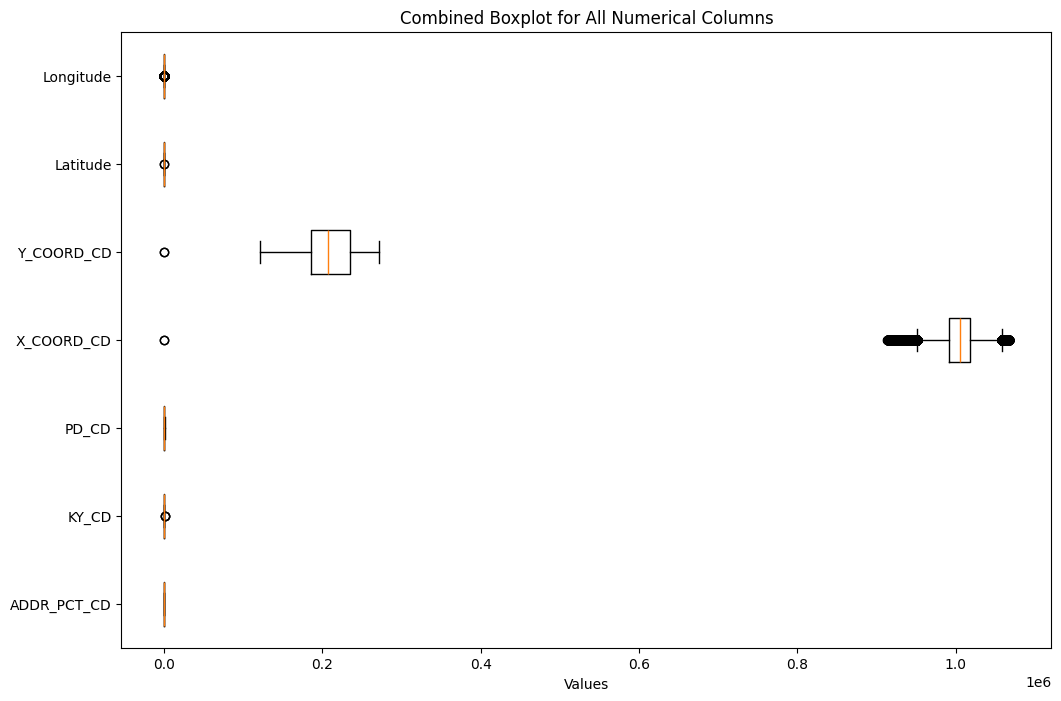

In [92]:
# Selecting only numerical columns for the combined boxplot
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting combined boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(numerical_data, vert=False, labels=numerical_data.columns)
plt.title("Combined Boxplot for All Numerical Columns")
plt.xlabel("Values")
plt.show()


In [93]:
# Function to apply IQR-based outlier capping
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Applying outlier capping to each relevant numerical column
for column in numerical_data:
    cap_outliers(data, column)

# Checking the capped columns to confirm outliers are handled
numerical_data.describe()


,ADDR_PCT_CD,KY_CD,PD_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,433259.000000,433259.000000,433259.000000,4.332590e+05,433259.000000,433259.000000,433259.000000
mean,63.937931,301.148200,420.430401,1.005583e+06,207725.567813,40.736599,-73.922634
std,35.148740,158.017153,230.421032,2.154422e+04,29876.207040,0.119933,0.176641
min,1.000000,101.000000,100.000000,0.000000e+00,0.000000,0.000000,-74.254555
25%,40.000000,117.000000,258.000000,9.913670e+05,185568.000000,40.675980,-73.974334
50%,63.000000,341.000000,384.000000,1.005040e+06,207092.000000,40.735027,-73.924932
75%,102.000000,351.000000,638.000000,1.017983e+06,235058.000000,40.811838,-73.878203
max,123.000000,881.000000,969.000000,1.067306e+06,271819.000000,40.912714,0.000000


In [94]:
# Replacing "(null)" entries with NaN for proper handling
data['BORO_NM'].replace("(null)", pd.NA, inplace=True)
data['LOC_OF_OCCUR_DESC'].replace("(null)", pd.NA, inplace=True)

# Checking the number of nulls in these columns after replacement
null_counts_boro_loc = data[['BORO_NM', 'LOC_OF_OCCUR_DESC']].isnull().sum()
null_counts_boro_loc


<ipython-input-94-391308aefb00>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-94-391308aefb00>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

,0
BORO_NM,476
LOC_OF_OCCUR_DESC,94955


In [95]:
# Filling missing values in `BORO_NM` with the most common value (mode)
data['BORO_NM'].fillna(data['BORO_NM'].mode()[0], inplace=True)

# Filling missing values in `LOC_OF_OCCUR_DESC` with "Not Specified"
data['LOC_OF_OCCUR_DESC'].fillna("Not Specified", inplace=True)

# Verifying that there are no missing values in these columns now
null_counts_after_fill = data[['BORO_NM', 'LOC_OF_OCCUR_DESC']].isnull().sum()
null_counts_after_fill


<ipython-input-95-8b3a7ce5bda5>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-95-8b3a7ce5bda5>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

,0
BORO_NM,0
LOC_OF_OCCUR_DESC,0


In [96]:
# Display the number of unique values in each column
unique_counts = data.nunique()

# Display unique values for selected columns (e.g., 'Column1' and 'Column2')
selected_columns = ['HADEVELOPT','BORO_NM', 'OFNS_DESC', 'PREM_TYP_DESC']  # Adjust this list based on your needs
selected_unique_values = {col: data[col].unique().tolist() for col in selected_columns}

# Output summary
print("unique value number:",unique_counts)
for column in selected_columns:
  print(f"{column}: {data[column].unique()}")


unique value number: CMPLNT_NUM           433259
ADDR_PCT_CD              77
BORO_NM                   5
CMPLNT_FR_DT           1857
CMPLNT_FR_TM           1440
CMPLNT_TO_DT           1417
CMPLNT_TO_TM           1440
CRM_ATPT_CPTD_CD          2
HADEVELOPT               37
JURIS_DESC               21
KY_CD                    67
LAW_CAT_CD                3
LOC_OF_OCCUR_DESC         6
OFNS_DESC                57
PARKS_NM                470
PD_CD                   375
PD_DESC                 366
PREM_TYP_DESC            84
RPT_DT                  274
Lat_Lon               65611
X_COORD_CD            42601
Y_COORD_CD            49203
Latitude              62161
Longitude             58444
dtype: int64
HADEVELOPT: ['(null)' 'WEST BRIGHTON I' 'WEST BRIGHTON II' 'TODT HILL'
 'MARKHAM GARDENS' 'RICHMOND TERRACE' 'STAPLETON' 'RED HOOK EAST'
 'RED HOOK WEST' 'SMITH' 'RIIS' 'WALD' 'CAMPOS PLAZA I' 'MARLBORO'
 'INGERSOLL' 'FIRST HOUSES' 'LOWER EAST SIDE II' 'RIIS II'
 'LOWER EAST SIDE REHAB (GROUP 

In [97]:
# Find the columns and rows with `(null)` values
null_columns = data.columns[data.isin(['(null)']).any()].tolist()  # Columns containing `(null)`
null_rows = data[data.isin(['(null)']).any(axis=1)].shape[0]  # Rows containing `(null)`

null_columns, null_rows


(['HADEVELOPT', 'OFNS_DESC', 'PARKS_NM', 'PD_DESC', 'PREM_TYP_DESC'], 433259)

In [98]:
# Replace `(null)` values with "unspecified"
data.replace('(null)', 'unspecified', inplace=True)

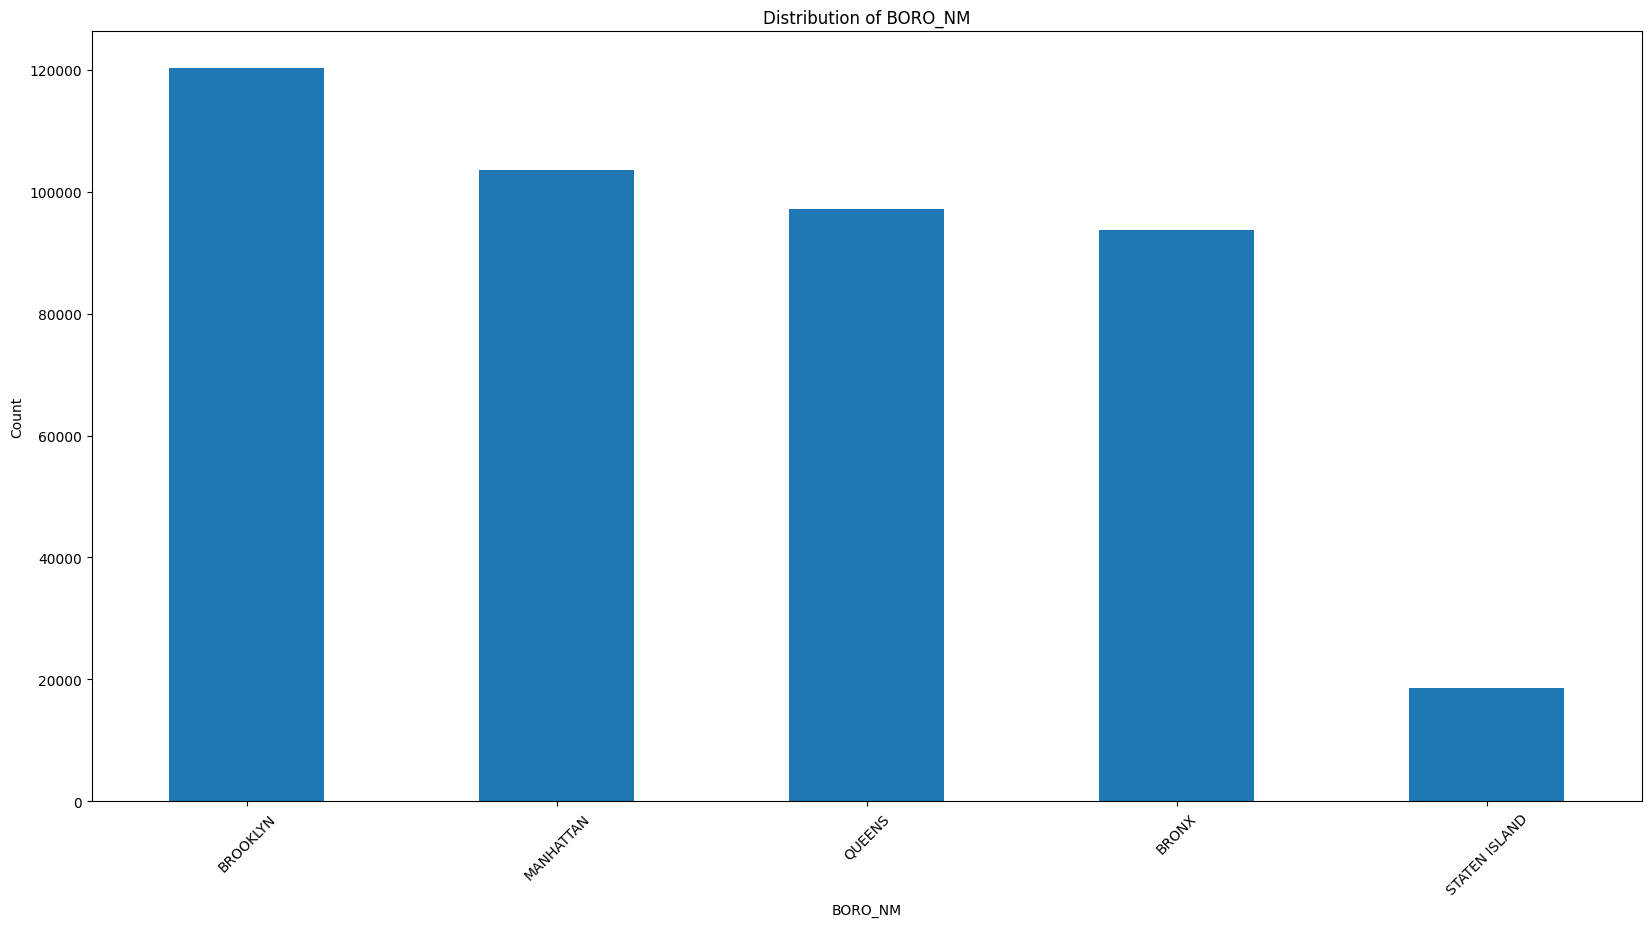

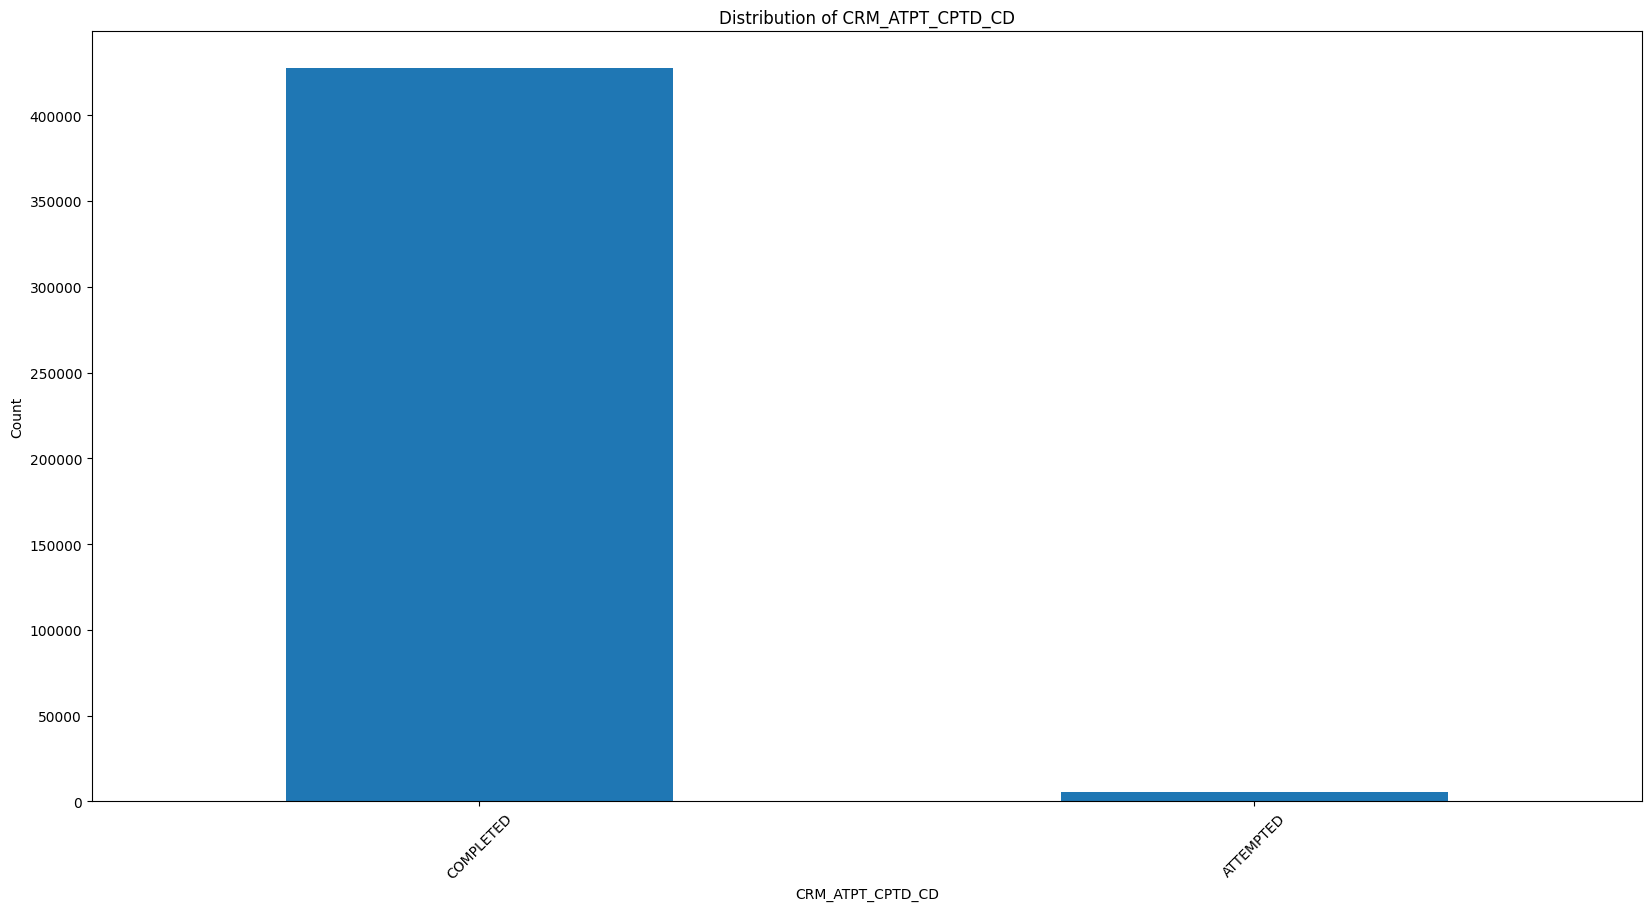

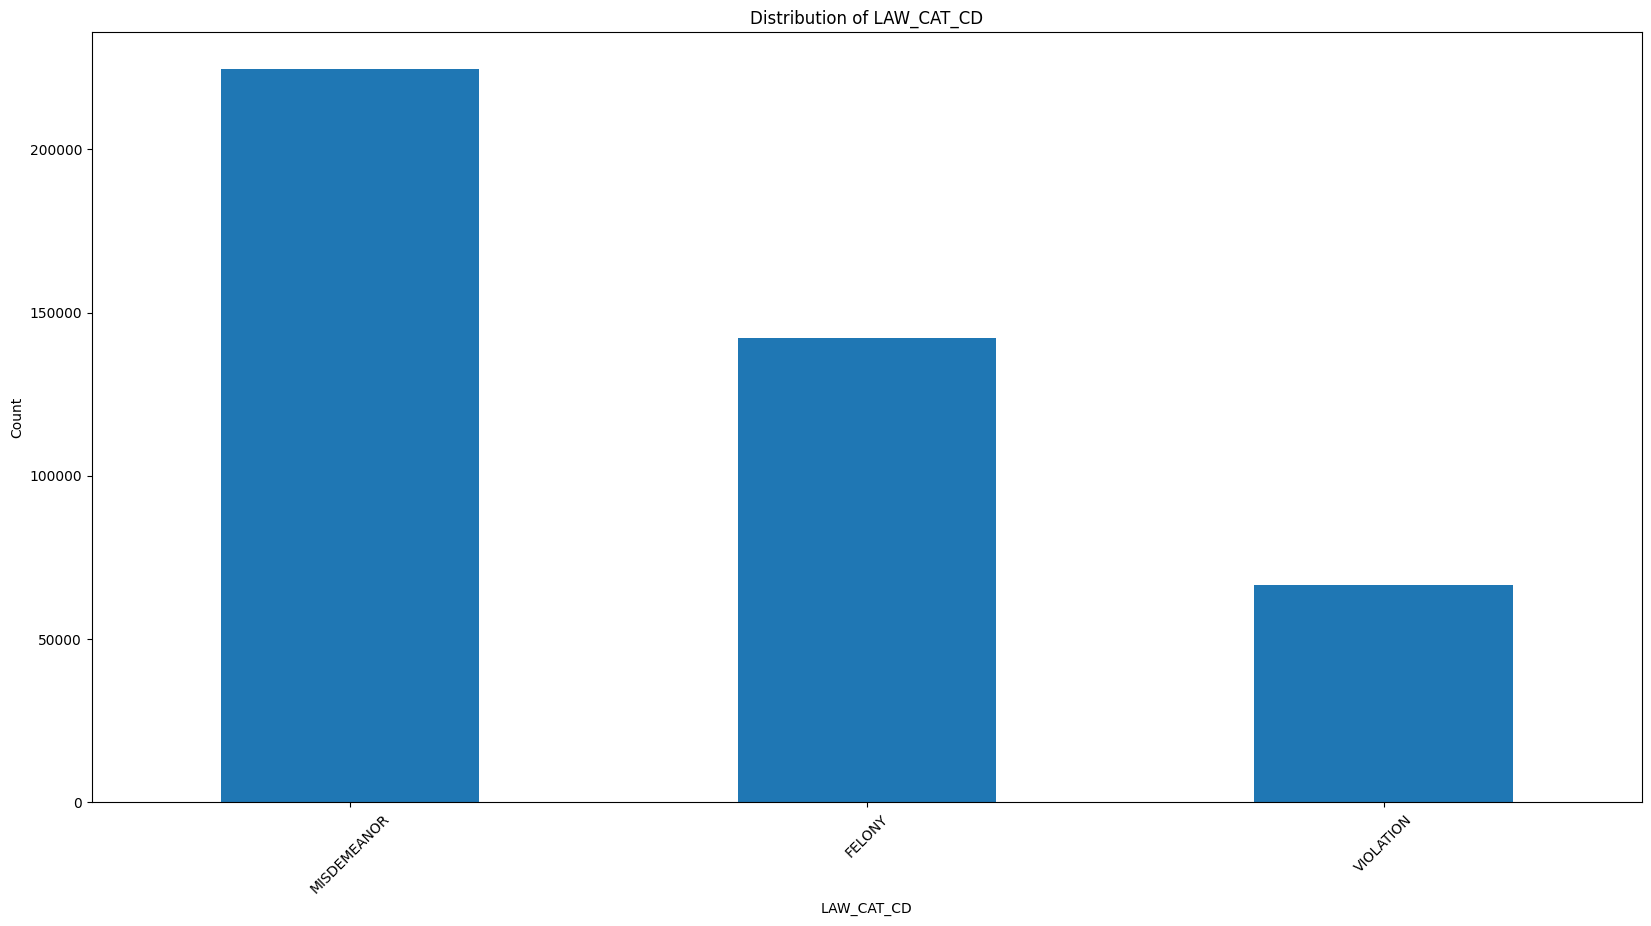

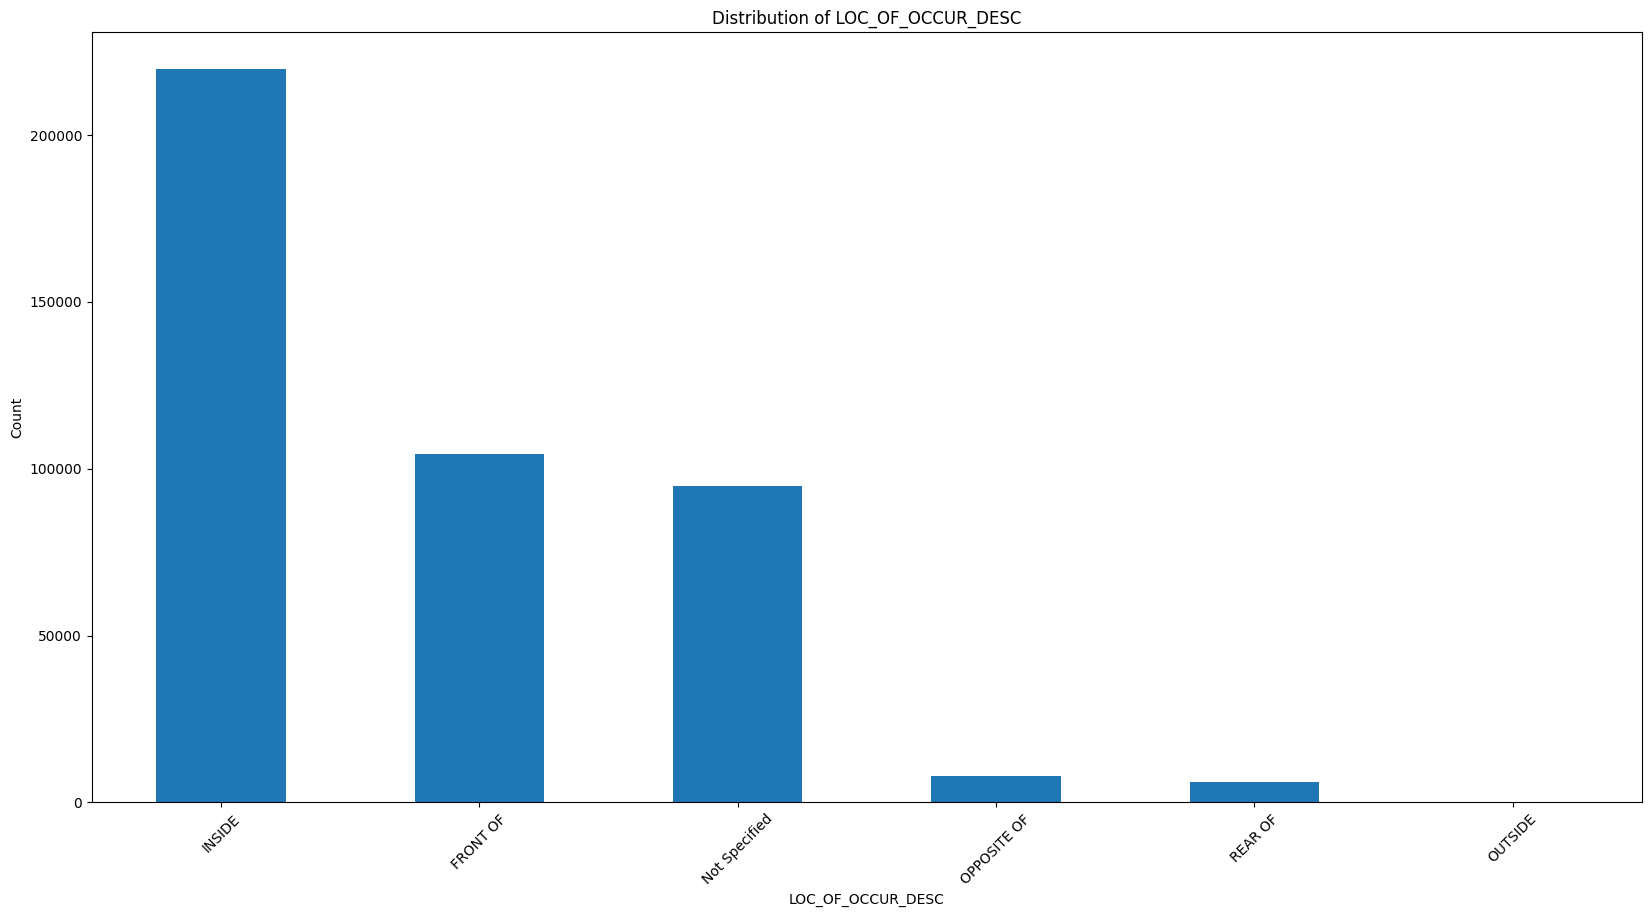

In [99]:
# Selecting categorical columns (descriptive columns) for visualization
categorical_columns = data.select_dtypes(include=['object']).columns

# Plotting bar charts for a few key descriptive columns to understand their distributions
# Limiting to columns with a reasonable number of unique values for readability

for column in categorical_columns:
    unique_values = data[column].nunique()
    if unique_values <= 15:  # Restricting to columns with fewer unique values for readability
        plt.figure(figsize=(20, 10))
        data[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


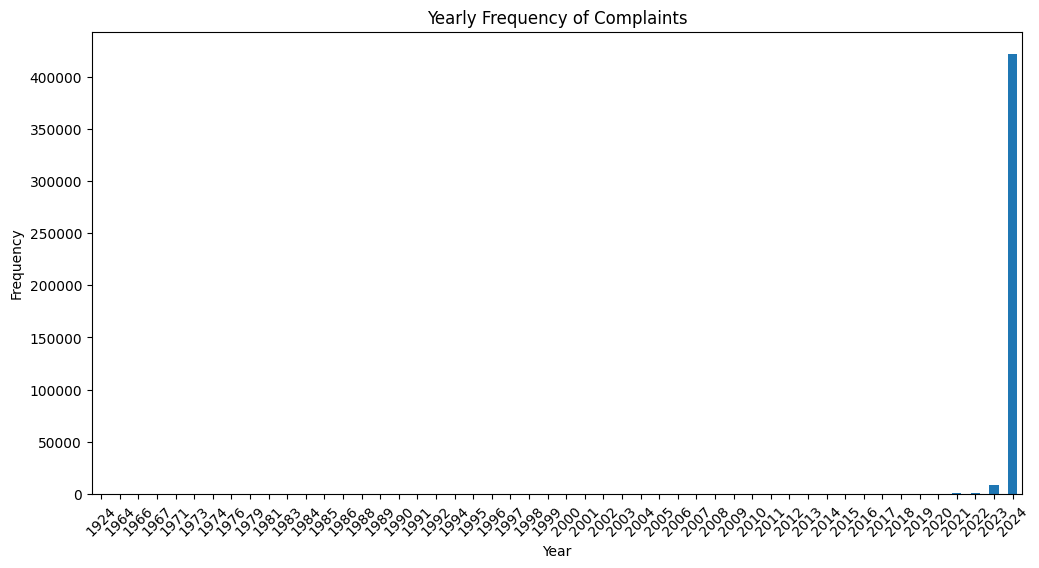

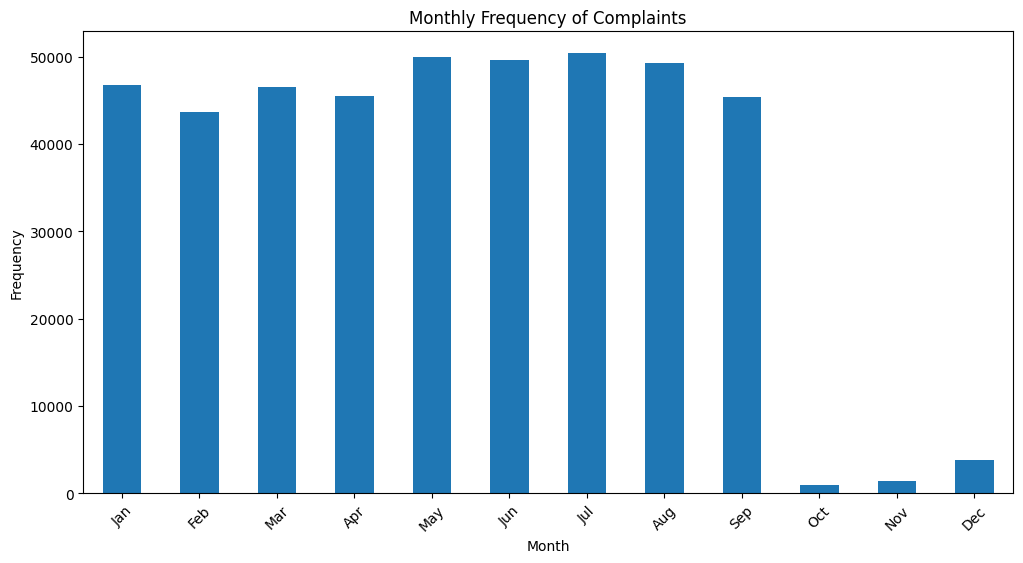

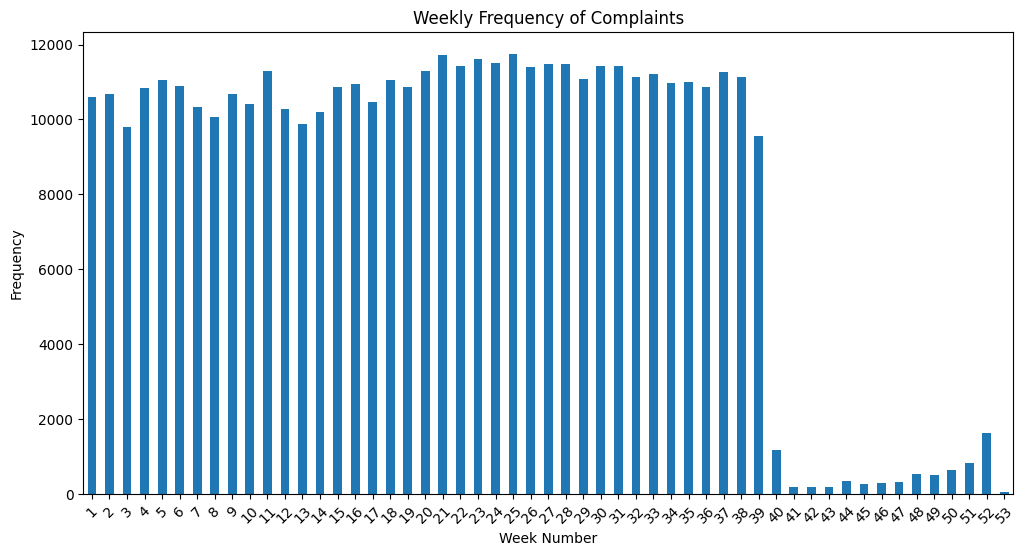

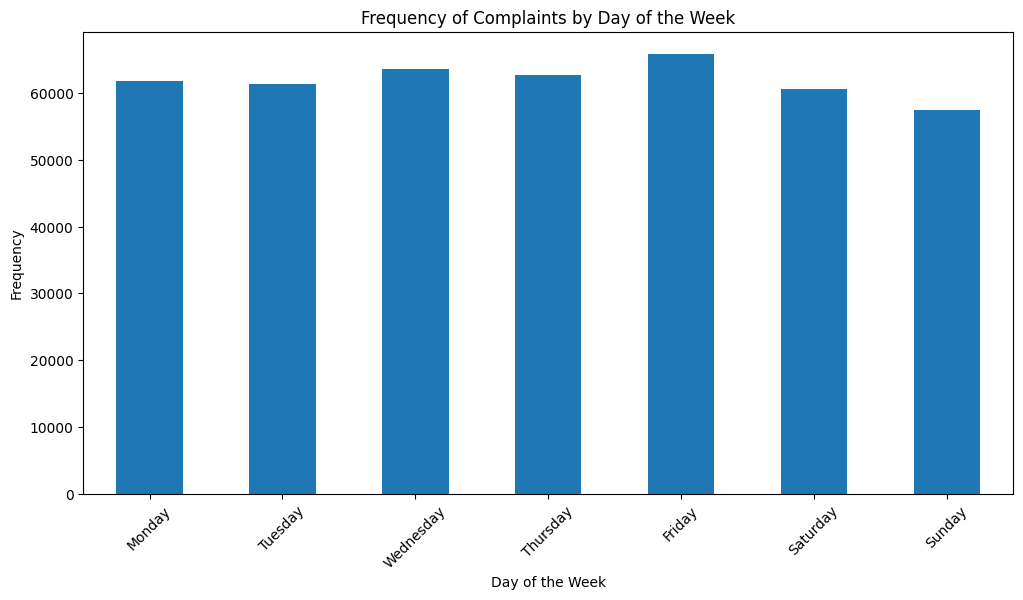

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure CMPLNT_FR_DT is in datetime format
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')

# Extract time components
data['Year'] = data['CMPLNT_FR_DT'].dt.year
data['Month'] = data['CMPLNT_FR_DT'].dt.month
data['Week'] = data['CMPLNT_FR_DT'].dt.isocalendar().week
data['DayOfWeek'] = data['CMPLNT_FR_DT'].dt.day_name()

# 1. Yearly Frequency
plt.figure(figsize=(12, 6))
data['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Yearly Frequency of Complaints')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 2. Monthly Frequency
plt.figure(figsize=(12, 6))
data['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Monthly Frequency of Complaints')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# 3. Weekly Frequency
plt.figure(figsize=(12, 6))
data['Week'].value_counts().sort_index().plot(kind='bar')
plt.title('Weekly Frequency of Complaints')
plt.xlabel('Week Number')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 4. Day of the Week Frequency
plt.figure(figsize=(12, 6))
data['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
plt.title('Frequency of Complaints by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [101]:
# Find the earliest and latest complaint dates
earliest_complaint = data['Year'].min()
latest_complaint = data['Year'].max()

earliest_complaint, latest_complaint

(1924, 2024)

In [102]:
data.head()


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,RPT_DT,Lat_Lon,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Year,Month,Week,DayOfWeek
0,287066200,123,STATEN ISLAND,2024-05-17,22:21:00,2024-05-17,22:25:00,COMPLETED,unspecified,N.Y. POLICE DEPT,...,05/17/2024,POINT (-74.169591 40.545217),951443.0,137959.0,40.545217,-74.11853,2024,5,20,Friday
1,287424426,121,STATEN ISLAND,2024-05-24,17:20:00,2024-05-24,17:25:00,COMPLETED,unspecified,N.Y. POLICE DEPT,...,05/24/2024,POINT (-74.169067 40.582305),951443.0,151471.0,40.582305,-74.11853,2024,5,21,Friday
2,290583574,121,STATEN ISLAND,2024-06-05,07:00:00,2024-06-10,07:00:00,COMPLETED,unspecified,N.Y. POLICE DEPT,...,07/24/2024,POINT (-74.167396 40.638927),951443.0,172099.0,40.638927,-74.11853,2024,6,23,Wednesday
3,289989348,121,STATEN ISLAND,2024-07-12,18:50:00,2024-07-12,19:05:00,COMPLETED,unspecified,N.Y. POLICE DEPT,...,07/12/2024,POINT (-74.163438 40.626851),951443.0,167697.0,40.626851,-74.11853,2024,7,28,Friday
4,283856947,121,STATEN ISLAND,2024-03-16,19:45:00,2024-03-16,20:00:00,COMPLETED,unspecified,N.Y. POLICE DEPT,...,03/16/2024,POINT (-74.155867 40.631331),951443.0,169325.0,40.631331,-74.11853,2024,3,11,Saturday


Observations and Potential Impacts:
#1) **Data Skewness (Recent Years Dominate):**

- The counts for 2023 (8,642) and 2024 (422,327) are overwhelmingly higher than for earlier years.
- This indicates the data is heavily skewed toward recent years, which might:
 - Reflect more comprehensive or automated data collection in recent times.
 - Suggest a systemic issue in older data reporting (missing or incomplete data).
 - Lead to biases if trends over time are analyzed without accounting for this skew.

#2)**Insights May Be Overwhelmed by Recent Data:**

- Trends or patterns dominated by 2023 and 2024 might overshadow earlier years.
- Insights focusing on older years (e.g., 2000–2020) may become irrelevant or obscured unless recent years are proportionally adjusted.

#3) **Potential Reporting or Processing Issues:**

- The leap in complaint counts between 2022 and 2023 (824 to 8,642) raises questions:
 - Was there a change in the reporting system, making it easier to log complaints?

 - Did an external event (e.g., new policies, a crisis) drive this spike?
 - Is this a data quality issue where older data might be incomplete?

#4) **Temporal Trends Might Be Misleading:**

For time-series analysis (yearly trends), data needs to be normalized or weighted to account for this disparity.
The spike in 2024 could disproportionately affect insights, making earlier trends appear less significant.

#5) **Actionable Adjustments:**

**Analyze the Source of Skew:** Investigate why complaint counts for 2024 are so high (policy, population growth, better systems, etc.).

**Normalize Data:** If analyzing trends over time, scale counts or compute per capita complaint rates (if population data is available).

**Segment Analysis:** Compare recent years (2020–2024) separately from earlier years to avoid overshadowing older trends.

**Focus on Categories:** If specific complaint types (e.g., crimes or violations) are driving this spike, focus on their distribution over time.

In [103]:
data['Year'].unique()

array([2024, 2023, 2014, 2020, 2019, 2015, 2021, 2000, 2022, 2016, 2018,
       2007, 2017, 2012, 2013, 1994, 1924, 1985, 2005, 2004, 2010, 2009,
       1998, 1983, 1976, 2006, 1974, 1995, 2002, 2008, 2001, 1971, 2011,
       1973, 1991, 1996, 1981, 2003, 1984, 1989, 1997, 1999, 1964, 1992,
       1990, 1967, 1986, 1988, 1966, 1979], dtype=int32)

In [104]:
# Count the frequency of each year
yearly_frequency = data['Year'].value_counts().sort_index()

# Display the result
yearly_frequency

,count
Year,
1924,3
1964,1
1966,1
1967,1
1971,1
1973,1
1974,3
1976,2
1979,1


In [105]:
data.isnull().sum()

,0
CMPLNT_NUM,0
ADDR_PCT_CD,0
BORO_NM,0
CMPLNT_FR_DT,0
CMPLNT_FR_TM,0
CMPLNT_TO_DT,0
CMPLNT_TO_TM,0
CRM_ATPT_CPTD_CD,0
HADEVELOPT,0
JURIS_DESC,0


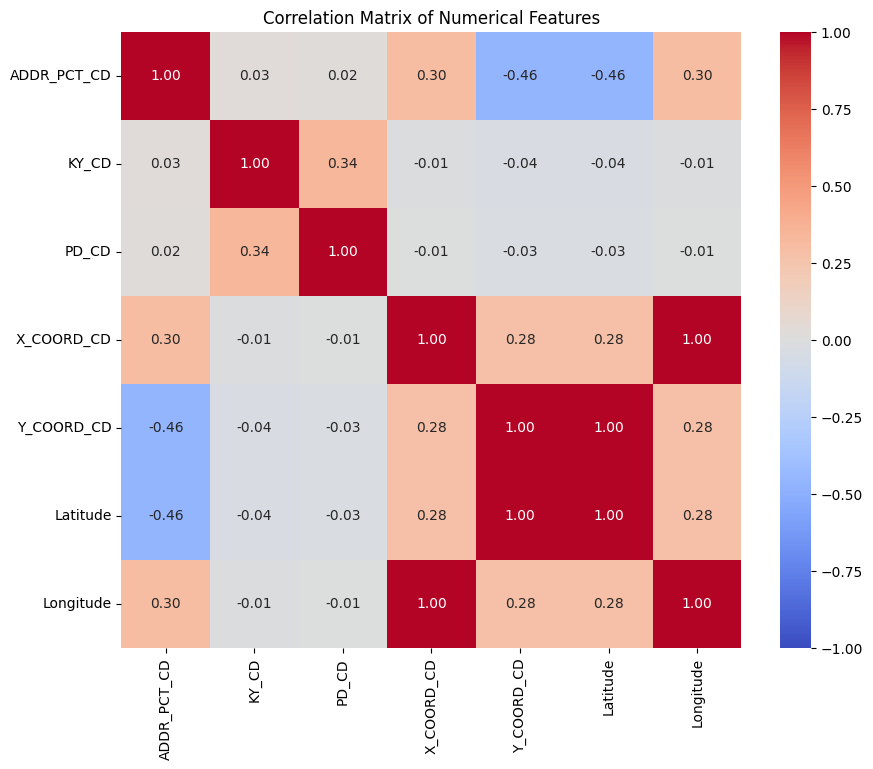

In [106]:
import seaborn as sns

# Calculating the correlation matrix for numerical columns
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [107]:
# Plot the crime rates by incident type using Plotly.
import plotly.express as px
# Calculate the counts of each incident type
incident_type_counts = data['OFNS_DESC'].value_counts()

# Plot the crime rates by incident type
fig_incident_type = px.bar(incident_type_counts, x=incident_type_counts.index, y=incident_type_counts.values,
                           title='Crime Rates by Incident Type',
                           labels={'x': 'Incident Type', 'y': 'Crime Rate'})
fig_incident_type.update_xaxes(tickangle=45)
fig_incident_type.show()


In [108]:
# # Filter out rows with missing latitude or longitude
# data_map = data.dropna(subset=['Latitude', 'Longitude'])

# # Plotting crime hotspots on a map of NYC
# fig_hotspots = px.scatter_mapbox(data_map, lat="Latitude", lon="Longitude",
#                                  hover_name="OFNS_DESC", hover_data=["BORO_NM", "LAW_CAT_CD"],
#                                  color_discrete_sequence=["red"], zoom=10, height=600,
#                                  title="NYC Crime Hotspots by Location")

# # Use an open-street map style
# fig_hotspots.update_layout(mapbox_style="open-street-map")
# fig_hotspots.show()


In [109]:
# Group by borough and count the number of incidents in each
borough_crime_counts = data['BORO_NM'].value_counts()

# Plotting the crime rates across boroughs
fig_borough_comparison = px.bar(borough_crime_counts,
                                x=borough_crime_counts.index,
                                y=borough_crime_counts.values,
                                title="Crime Rates Across NYC Boroughs",
                                labels={'x': 'Borough', 'y': 'Crime Rate'})
fig_borough_comparison.show()


In [110]:
import pandas as pd
incident_type_counts = data.groupby(['OFNS_DESC', 'LAW_CAT_CD']).size().reset_index(name='Crime Rate')

# Plot the crime rates by incident type with different colors for LAW_CAT_CD
fig_incident_type = px.bar(incident_type_counts, x='OFNS_DESC', y='Crime Rate', color='LAW_CAT_CD',
                           title='Crime Rates by Incident Type with Law Category',
                           labels={'OFNS_DESC': 'Incident Type', 'Crime Rate': 'Number of Incidents'},
                           height=600)
fig_incident_type.update_xaxes(tickangle=45)
fig_incident_type.show()


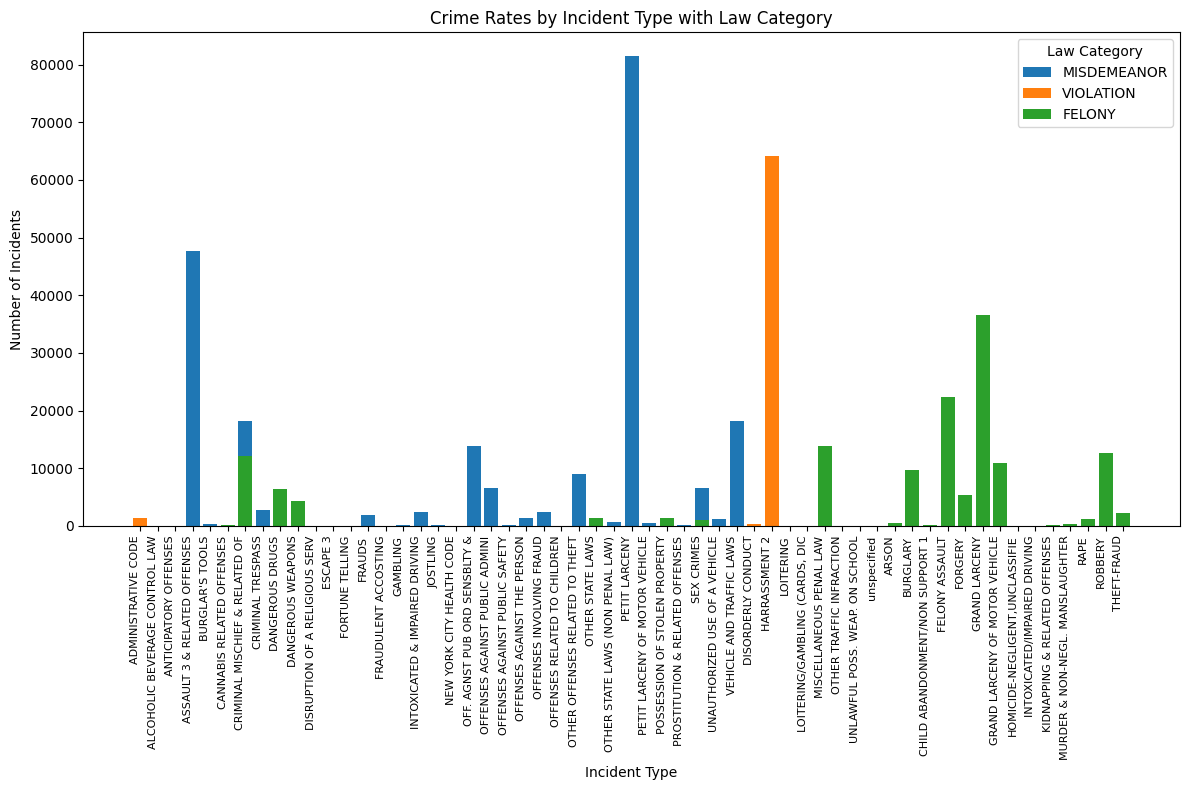

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded with the NYPD dataset

# Group data by 'OFNS_DESC' and 'LAW_CAT_CD' to get counts by incident type and law category
incident_type_counts = data.groupby(['OFNS_DESC', 'LAW_CAT_CD']).size().reset_index(name='Crime Rate')

# Create a static bar plot for crime rates by incident type with different colors for LAW_CAT_CD
plt.figure(figsize=(12, 8))
for law_category in incident_type_counts['LAW_CAT_CD'].unique():
    subset = incident_type_counts[incident_type_counts['LAW_CAT_CD'] == law_category]
    plt.bar(subset['OFNS_DESC'], subset['Crime Rate'], label=law_category)

# Customize plot
plt.title('Crime Rates by Incident Type with Law Category')
plt.xlabel('Incident Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.legend(title='Law Category')
plt.tight_layout()

# Display the plot
plt.show()


In [123]:
import plotly.express as px

# Ensure Mapbox token is set (if required)
px.set_mapbox_access_token("your_mapbox_access_token")

# Separate data by offense categories
offense_categories = data['LAW_CAT_CD'].unique()

# Generate and display a separate 3D map for each law category
for offense_type in offense_categories:
    # Filter the data for the current law category (e.g., Felony, Misdemeanor, Violation)
    offense_data = data[data['LAW_CAT_CD'] == offense_type]

    # Plotting the hotspots for the current offense type on a 3D map of NYC
    fig_offense_map = px.scatter_mapbox(
        offense_data,
        lat="Latitude",
        lon="Longitude",
        hover_name="OFNS_DESC",
        hover_data=["BORO_NM", "LAW_CAT_CD"],
        color_discrete_sequence=["blue"],
        zoom=10,
        height=600,
        title=f"NYC Crime Hotspots for {offense_type} Offenses",
    )

    # Use a 3D mapbox style (e.g., satellite with streets or terrain)
    fig_offense_map.update_layout(
        mapbox_style="mapbox://styles/mapbox/satellite-streets-v11",
        mapbox=dict(
            bearing=0,  # Set rotation of the map
            pitch=60,  # Tilt the map for 3D view
        )
    )
    #fig_offense_map.show()


In [122]:
# Separate data by offense categories
offense_categories = data['LAW_CAT_CD'].unique()

# Generate and display a separate map for each law category
for offense_type in offense_categories:
    # Filter the data for the current law category (e.g., Felony, Misdemeanor, Violation)
    offense_data = data[data['LAW_CAT_CD'] == offense_type]

    # Plotting the hotspots for the current offense type on a map of NYC
    fig_offense_map = px.scatter_mapbox(offense_data, lat="Latitude", lon="Longitude",
                                        hover_name="OFNS_DESC", hover_data=["BORO_NM", "LAW_CAT_CD"],
                                        color_discrete_sequence=["blue"], zoom=10, height=600,
                                        title=f"NYC Crime Hotspots for {offense_type} Offenses")

    # Use an open-street map style
    fig_offense_map.update_layout(mapbox_style="open-street-map")
    #fig_offense_map.show()


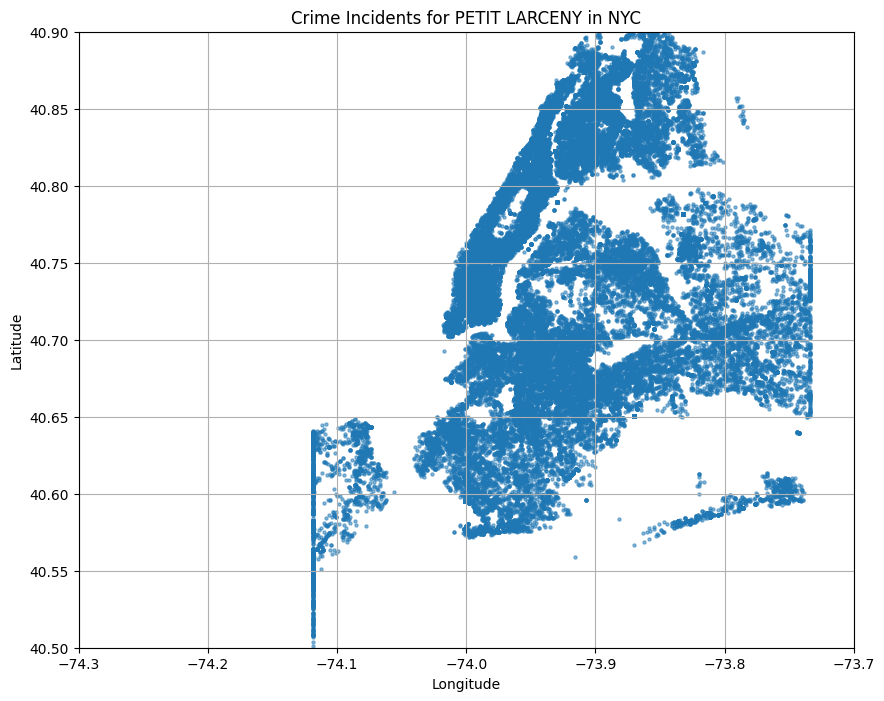

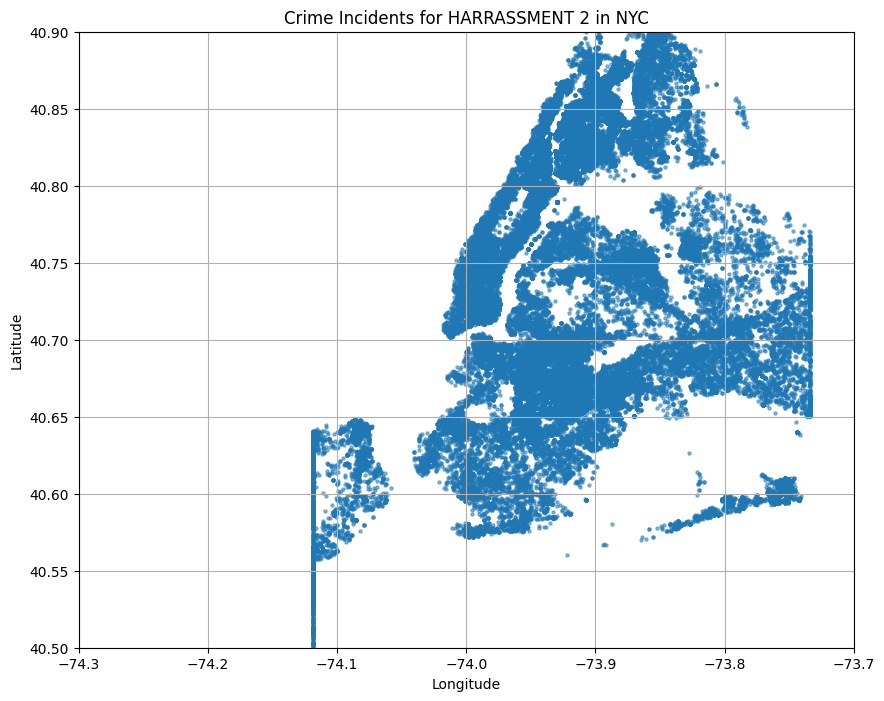

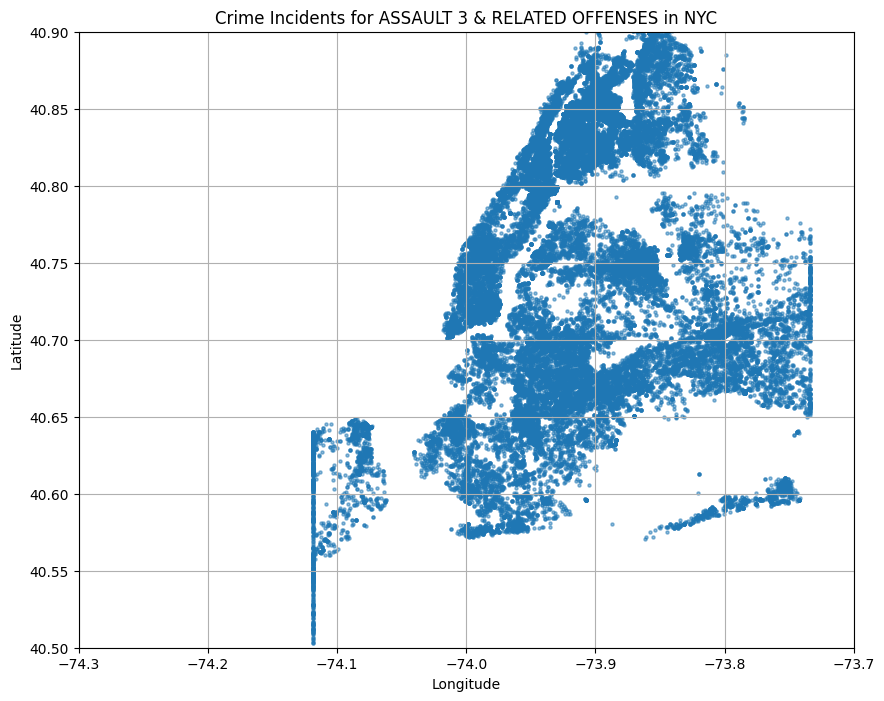

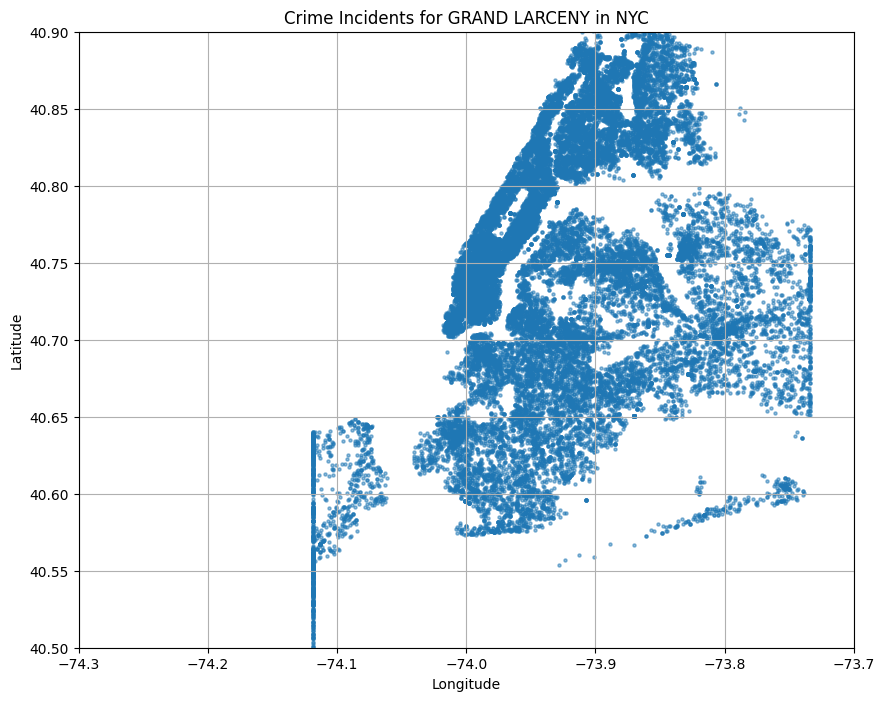

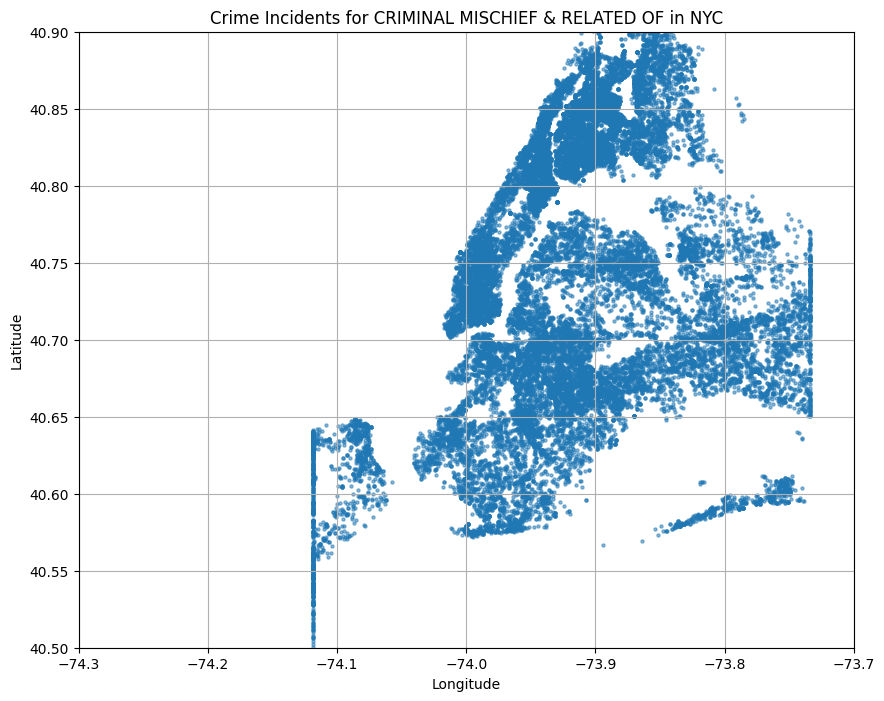

In [114]:
# # Convert offense descriptions to a list of unique offenses
# offense_types = data['OFNS_DESC'].unique()

# # Generate and display a separate map for each offense type
# for offense in offense_types:
#     # Filter the data for the current offense type
#     offense_data = data[data['OFNS_DESC'] == offense]

#     # Plotting the hotspots for the current offense type on a map of NYC
#     fig_offense_map = px.scatter_mapbox(offense_data, lat="Latitude", lon="Longitude",
#                                         hover_name="OFNS_DESC", hover_data=["BORO_NM", "LAW_CAT_CD"],
#                                         color_discrete_sequence=["blue"], zoom=10, height=600,
#                                         title=f"NYC Crime Hotspots for Offense: {offense}")

#     # Use an open-street map style
#     fig_offense_map.update_layout(mapbox_style="open-street-map")
#     fig_offense_map.show()
import matplotlib.pyplot as plt

# Get the top 5 most common offense types to map
top_offenses = data['OFNS_DESC'].value_counts().head(5).index

# Plot each offense type on a static map
for offense in top_offenses:
    # Filter data for the specific offense type
    offense_data = data[data['OFNS_DESC'] == offense]

    # Create a scatter plot for the offense type
    plt.figure(figsize=(10, 8))
    plt.scatter(offense_data['Longitude'], offense_data['Latitude'], alpha=0.5, s=5)
    plt.title(f"Crime Incidents for {offense} in NYC")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.xlim(-74.3, -73.7)  # Limits to focus on NYC area
    plt.ylim(40.5, 40.9)
    plt.grid(True)
    plt.show()


In [115]:
!pip install pandasql
import pandasql as ps

# calculate monthly distribution of crime incidents
query = """
SELECT
    strftime('%m', CMPLNT_FR_DT) AS Month,
    COUNT(*) AS Incident_Count
FROM
    data
GROUP BY
    Month
ORDER BY
    Month;
"""

# Execute the query to get monthly crime counts
monthly_crime_counts = ps.sqldf(query, locals())

# Plot the monthly distribution
fig = px.line(monthly_crime_counts, x='Month', y='Incident_Count',
              title="Monthly Distribution of Crime Incidents in NYC",
              labels={'Month': 'Month', 'Incident_Count': 'Number of Incidents'})

# Customize x-axis with month names
fig.update_xaxes(ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                 tickvals=monthly_crime_counts['Month'])

fig.show()


In [116]:
# Since we don't have a direct indicator for "arrested" and "escaped" in the dataset,
# we will use the "CRM_ATPT_CPTD_CD" column as a proxy.
# We'll assume "COMPLETED" may imply a successful crime (possibly with a suspect at large)
# and "ATTEMPTED" may imply the crime was disrupted (possibly with an escape or no completion).

# Importing necessary libraries
import pandas as pd
import plotly.express as px

borough_completion_status = data.groupby(['BORO_NM', 'CRM_ATPT_CPTD_CD']).size().reset_index(name='Incident_Count')

# Renaming columns for clarity
borough_completion_status.columns = ['Borough', 'Completion_Status', 'Incident_Count']

# Plotting the result
fig = px.bar(borough_completion_status, x='Borough', y='Incident_Count', color='Completion_Status',
             title="Crime Incidents by Completion Status for Each Borough",
             labels={'Borough': 'Borough', 'Incident_Count': 'Number of Incidents', 'Completion_Status': 'Crime Completion Status'},
             barmode='group')

fig.show()


In [117]:
# get crime completion status counts
query = """
SELECT
    CRM_ATPT_CPTD_CD AS Crime_Completion_Status,
    COUNT(*) AS Incident_Count
FROM
    data
GROUP BY
    Crime_Completion_Status
ORDER BY
    Incident_Count DESC;
"""

# Execute the query
crime_completion_status_counts = ps.sqldf(query, locals())

# Plotting
fig = px.bar(crime_completion_status_counts, x='Crime_Completion_Status', y='Incident_Count',
             title="Crime Incidents by Completion Status (Completed vs. Attempted)",
             labels={'Crime_Completion_Status': 'Crime Completion Status', 'Incident_Count': 'Number of Incidents'})
fig.show()

In [118]:
# get the top 10 premises types by incident count
query = """
SELECT
    PREM_TYP_DESC AS Premises_Type,
    COUNT(*) AS Incident_Count
FROM
    data
GROUP BY
    Premises_Type
ORDER BY
    Incident_Count DESC
LIMIT 10;
"""

# Execute the query
premises_type_counts = ps.sqldf(query, locals())

# Plotting
fig = px.bar(premises_type_counts, x='Premises_Type', y='Incident_Count',
             title="Top 10 Premises Types by Incident Count",
             labels={'Premises_Type': 'Premises Type', 'Incident_Count': 'Number of Incidents'})
fig.update_xaxes(tickangle=45)
fig.show()

In [119]:
# SQL query to get crime incident counts by hour
query = """
SELECT
    strftime('%H', CMPLNT_FR_TM) AS Hour,
    COUNT(*) AS Incident_Count
FROM
    data
GROUP BY
    Hour
ORDER BY
    Hour;
"""

# Execute the query
hourly_incidents = ps.sqldf(query, locals())

# Convert the hour from string to integer for categorization
hourly_incidents['Hour'] = hourly_incidents['Hour'].astype(int)

# Categorize as 'Day' or 'Night'
hourly_incidents['Time_of_Day'] = hourly_incidents['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Group by Time_of_Day and sum the incidents
time_of_day_counts = hourly_incidents.groupby('Time_of_Day')['Incident_Count'].sum().reset_index()

# Plotting the result
fig = px.bar(time_of_day_counts, x='Time_of_Day', y='Incident_Count',
             title="Crime Incidents by Time of Day (Day vs. Night)",
             labels={'Time_of_Day': 'Time of Day', 'Incident_Count': 'Number of Incidents'})
fig.show()


In [120]:
# get hourly crime incident counts

print(hourly_incidents)
# Execute the query
# hourly_incidents = ps.sqldf(query, locals())

# # Plotting
# fig = px.bar(hourly_incidents, x='Hour', y='Incident_Count',
#              title="Crime Incidents by Hour of the Day",
#              labels={'Hour': 'Hour of Day', 'Incident_Count': 'Number of Incidents'})
# fig.show()

    Hour  Incident_Count Time_of_Day
0      0           18990       Night
1      1           13151       Night
2      2           10825       Night
3      3            9231       Night
4      4            8019       Night
5      5            6281       Night
6      6            7196         Day
7      7           10500         Day
8      8           15762         Day
9      9           16352         Day
10    10           18341         Day
11    11           18600         Day
12    12           23321         Day
13    13           20771         Day
14    14           23654         Day
15    15           26601         Day
16    16           26409         Day
17    17           26548         Day
18    18           26462       Night
19    19           25249       Night
20    20           23997       Night
21    21           21206       Night
22    22           19265       Night
23    23           16528       Night
